# Goal:
## Analyze which skills are most frequently required in data analytics jobs, how skill demand varies across locations and experience levels, and visualize these insights.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [26]:
eda_data = pd.read_csv("../data/cleaned_data.csv")


In [27]:
eda_data.head()

,Unnamed: 0,title,company,location,posted_date,experience_level,skills,salary_lpa_min,salary_lpa_max,job_link
0,0,analytics intern,"lloyd, hoffman and hill",bangalore,2025-05-12,Internship,"Excel, Machine Learning, Python",1,2,https://www.martin.com/
1,1,analytics intern,"randolph, rivers and richardson",mumbai,2025-05-21,Internship,"SQL, Communication, Statistics",1,2,http://www.garner.net/
2,2,data engineer,liu llc,bangalore,2025-04-26,Mid Level,"Communication, Tableau, Excel",11,12,http://www.hudson.biz/
3,3,data analyst,murphy group,delhi,2025-05-22,Mid Level,"Power BI, Statistics, Excel",8,11,https://barton-martinez.com/
4,4,data analyst,taylor llc,gurgaon,2025-05-01,Entry Level,"Communication, Tableau, Python",4,6,http://www.jenkins.net/


In [28]:
eda_data.drop("Unnamed: 0", axis=1, inplace=True)

In [29]:
eda_data.head()

,title,company,location,posted_date,experience_level,skills,salary_lpa_min,salary_lpa_max,job_link
0,analytics intern,"lloyd, hoffman and hill",bangalore,2025-05-12,Internship,"Excel, Machine Learning, Python",1,2,https://www.martin.com/
1,analytics intern,"randolph, rivers and richardson",mumbai,2025-05-21,Internship,"SQL, Communication, Statistics",1,2,http://www.garner.net/
2,data engineer,liu llc,bangalore,2025-04-26,Mid Level,"Communication, Tableau, Excel",11,12,http://www.hudson.biz/
3,data analyst,murphy group,delhi,2025-05-22,Mid Level,"Power BI, Statistics, Excel",8,11,https://barton-martinez.com/
4,data analyst,taylor llc,gurgaon,2025-05-01,Entry Level,"Communication, Tableau, Python",4,6,http://www.jenkins.net/


In [30]:
#preprocessing the skills columns, converting them into list using a lambda funcion
eda_data['skills_list'] = eda_data['skills'].apply(lambda x: [skill.strip().lower() for skill in x.split(',')])


In [31]:
#getting all unique skills
all_skills = set(skill for sublist in eda_data['skills_list'] for skill in sublist)


In [32]:
#creating a binary columns for every skill
for skill in all_skills:
    eda_data[skill] = eda_data['skills_list'].apply(lambda x: skill in x)


In [33]:
#calculating overall demand for each skill
skill_counts = eda_data[list(all_skills)].sum()
skill_percent = (skill_counts / len(eda_data)) * 100
print(skill_percent.sort_values(ascending=False))


excel               52.694611
communication       51.696607
power bi            51.297405
python              51.097804
statistics          50.698603
sql                 50.499002
machine learning    49.500998
tableau             47.904192
dtype: float64


In [34]:
#calculating demand of a skill, using location
location_skill_demand = eda_data.groupby('location')[list(all_skills)].mean() * 100
print(location_skill_demand)


              python  communication  machine learning        sql      excel  \
location                                                                      
bangalore  47.272727      40.000000         45.454545  54.545455  58.181818   
chennai    48.387097      61.290323         53.225806  46.774194  53.225806   
delhi      46.774194      56.451613         51.612903  59.677419  48.387097   
gurgaon    43.055556      45.833333         55.555556  48.611111  55.555556   
hyderabad  69.230769      50.000000         53.846154  44.230769  53.846154   
mumbai     51.562500      46.875000         48.437500  56.250000  50.000000   
pune       44.615385      55.384615         49.230769  43.076923  49.230769   
remote     60.869565      56.521739         39.130435  50.724638  53.623188   

             tableau   power bi  statistics  
location                                     
bangalore  47.272727  52.727273   38.181818  
chennai    40.322581  48.387097   53.225806  
delhi      54.838710  46.

In [35]:
#calculating demand of a skill, using experience level
experience_skill_demand = eda_data.groupby('experience_level')[list(all_skills)].mean() * 100
print(experience_skill_demand)


                     python  communication  machine learning        sql  \
experience_level                                                          
Entry Level       54.504505      50.000000         49.099099  49.099099   
Internship        46.341463      62.195122         50.000000  47.560976   
Mid Level         52.892562      48.760331         45.454545  52.066116   
Senior Level      43.421053      50.000000         56.578947  55.263158   

                      excel    tableau   power bi  statistics  
experience_level                                               
Entry Level       50.000000  46.846847  47.747748   51.351351  
Internship        47.560976  52.439024  48.780488   48.780488  
Mid Level         56.198347  44.628099  56.198347   50.413223  
Senior Level      60.526316  51.315789  56.578947   51.315789  


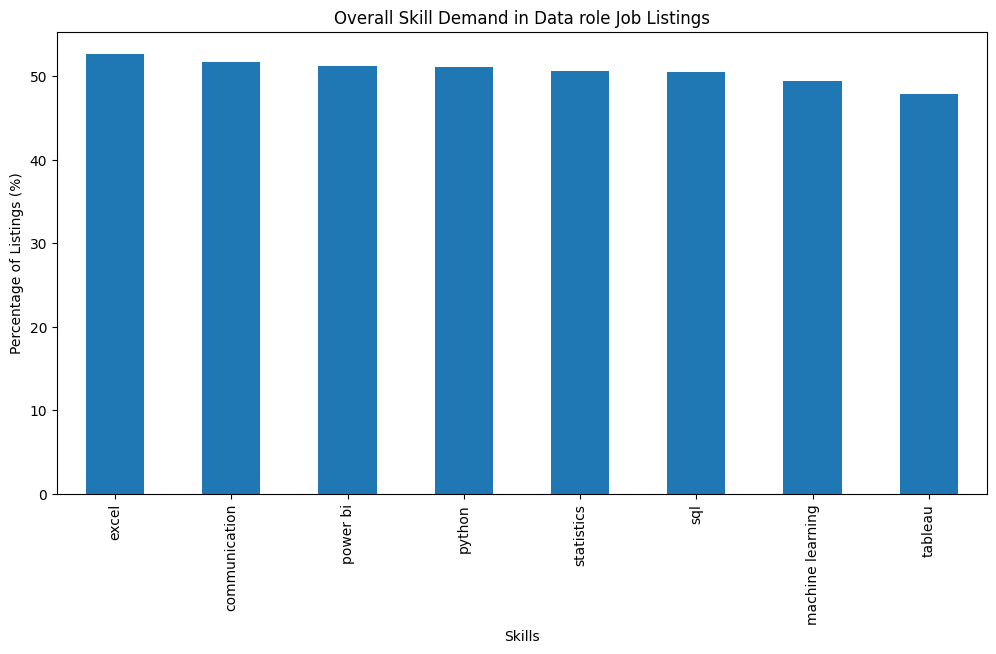

<Figure size 640x480 with 0 Axes>

In [36]:
# bar graph: representing overall skill demand in data related job listings 
plt.figure(figsize=(12,6))
skill_percent.sort_values(ascending=False).plot(kind='bar')
plt.title('Overall Skill Demand in Data role Job Listings')
plt.ylabel('Percentage of Listings (%)')
plt.xlabel('Skills')
plt.show()
plt.savefig('../Images/plots/Overall_skill_demand.png')

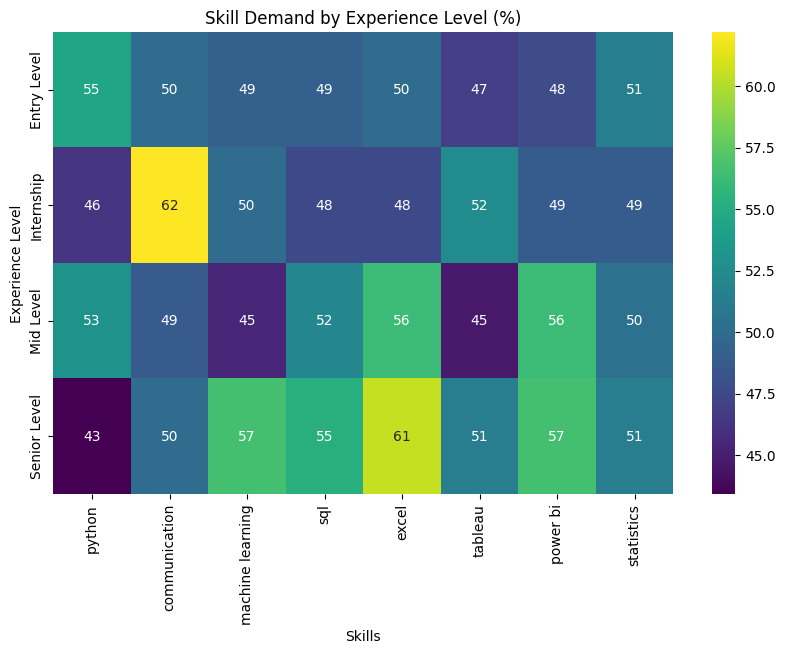

<Figure size 640x480 with 0 Axes>

In [37]:
#heatmap , skill demand by experience level
plt.figure(figsize=(10,6))
sns.heatmap(experience_skill_demand, annot=True, cmap='viridis')
plt.title('Skill Demand by Experience Level (%)')
plt.ylabel('Experience Level')
plt.xlabel('Skills')
plt.show()
plt.savefig('../Images/plots/Overall_skill_demand_experience_heatmap.png')

In [38]:
#skill and salary correlaation
skill_salary_corr = eda_data[list(all_skills)].apply(lambda x: np.corrcoef(x, eda_data['salary_lpa_max'])[0,1])
print(skill_salary_corr.sort_values(ascending=False))


excel               0.078192
power bi            0.071184
sql                 0.044065
machine learning    0.042624
tableau             0.003973
statistics         -0.001323
communication      -0.034577
python             -0.041888
dtype: float64


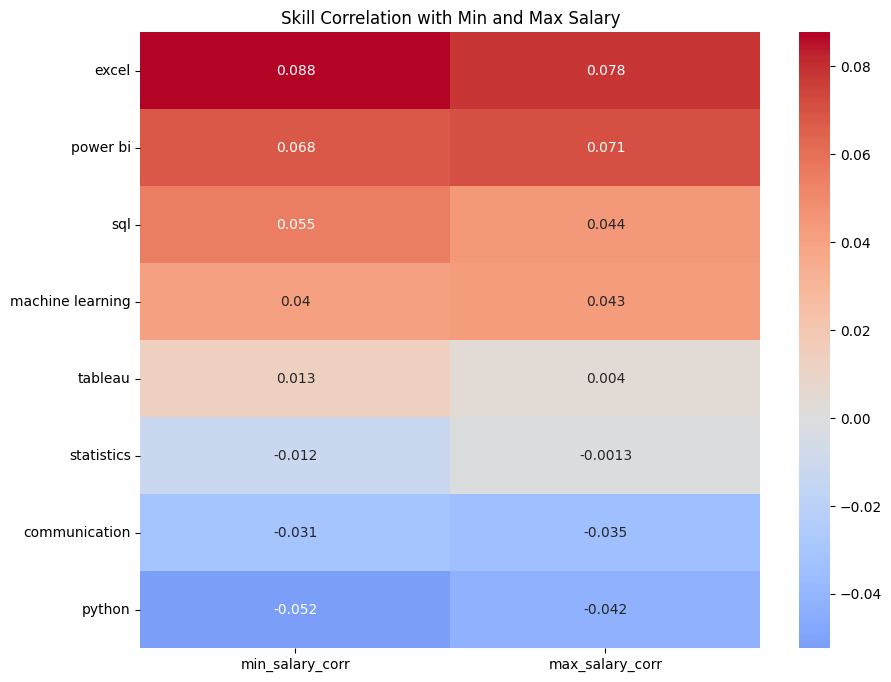

<Figure size 640x480 with 0 Axes>

In [39]:
#heatmap representing correlation
corr_df = pd.DataFrame({
    'min_salary_corr': eda_data[list(all_skills)].apply(lambda x: np.corrcoef(x.astype(int), eda_data['salary_lpa_min'])[0,1]),
    'max_salary_corr': skill_salary_corr
})

plt.figure(figsize=(10,8))
sns.heatmap(corr_df.sort_values('max_salary_corr', ascending=False), annot=True, cmap='coolwarm', center=0)
plt.title('Skill Correlation with Min and Max Salary')
plt.show()
plt.savefig('../Images/plots/skill_correlation.png')

C:\Users\Dell\AppData\Local\Temp\ipykernel_13444\183571839.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')


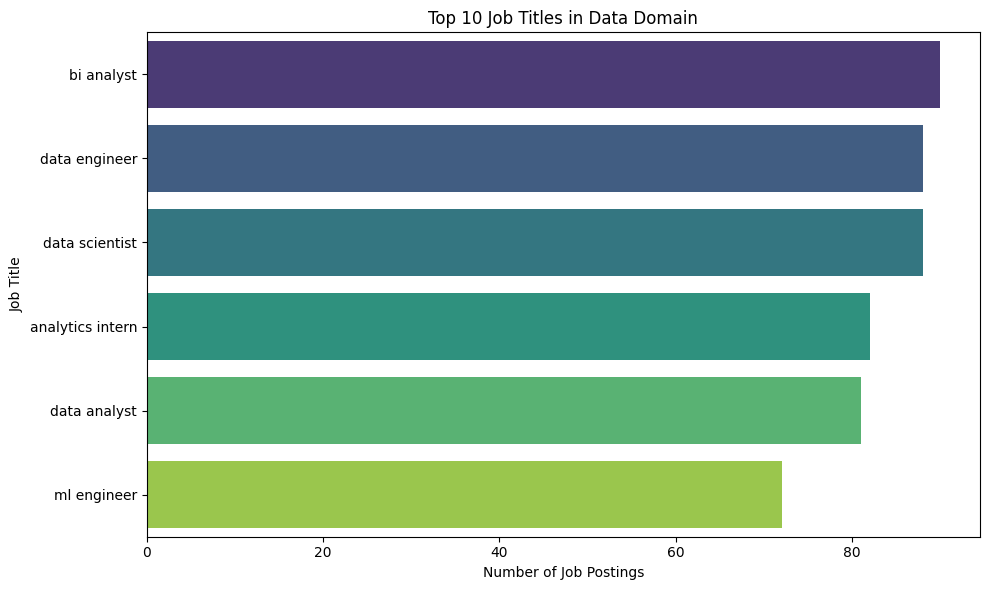

In [47]:
top_titles = eda_data['title'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_titles.values, y=top_titles.index, palette='viridis')
plt.title('Top 10 Job Titles in Data Domain')
plt.xlabel('Number of Job Postings')
plt.ylabel('Job Title')
plt.tight_layout()
plt.savefig('../Images/plots/Top10jobs.png')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13444\1184668314.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')


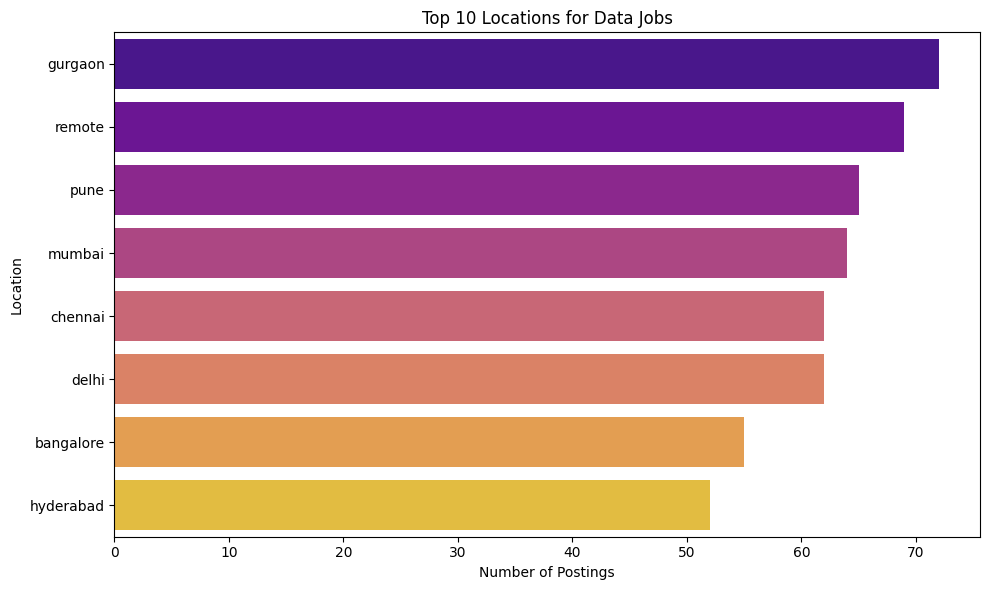

In [48]:
top_locations = eda_data['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
plt.title('Top 10 Locations for Data Jobs')
plt.xlabel('Number of Postings')
plt.ylabel('Location')
plt.tight_layout()
plt.savefig('../Images/plots/top_locations.png')
plt.show()


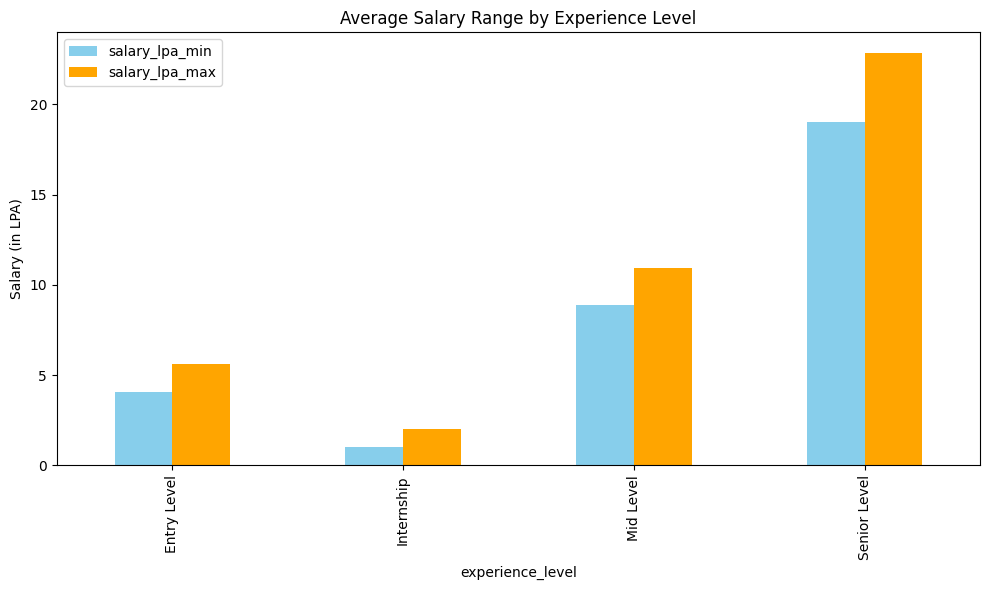

In [49]:
salary_by_exp = eda_data.groupby('experience_level')[['salary_lpa_min', 'salary_lpa_max']].mean().reset_index()

salary_by_exp.plot(x='experience_level', kind='bar', figsize=(10,6), 
                   y=['salary_lpa_min', 'salary_lpa_max'], 
                   title='Average Salary Range by Experience Level', 
                   color=['skyblue', 'orange'])
plt.ylabel('Salary (in LPA)')
plt.tight_layout()
plt.savefig('../Images/plots/salary_by_experience.png')
plt.show()


In [43]:

skill_counter = Counter()

eda_data['skills'].dropna().str.split(', ').apply(skill_counter.update)

top_skills = pd.Series(skill_counter).sort_values(ascending=False).head(10)


C:\Users\Dell\AppData\Local\Temp\ipykernel_13444\3523886588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')


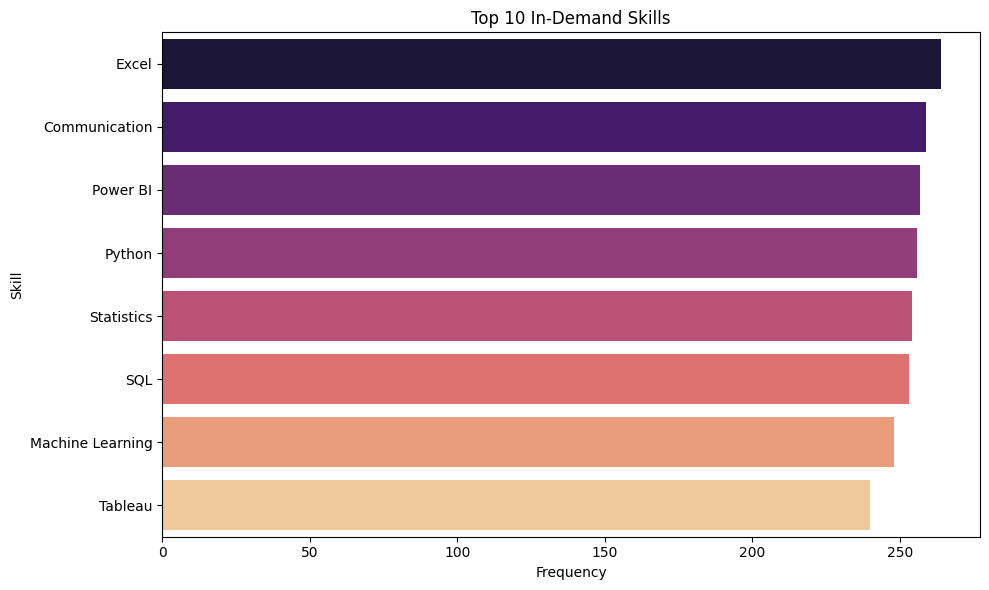

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')
plt.title('Top 10 In-Demand Skills')
plt.xlabel('Frequency')
plt.ylabel('Skill')
plt.tight_layout()
plt.savefig('../Images/plots/top_skills.png')
plt.show()


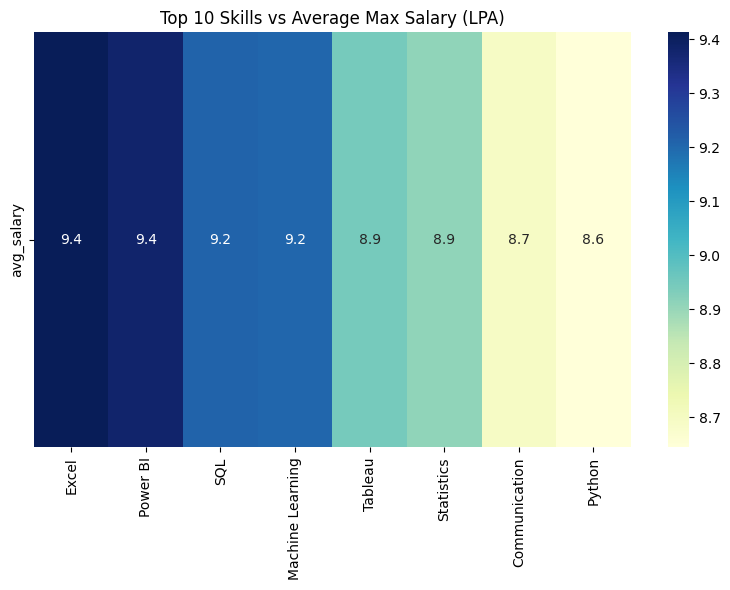

In [51]:
# Fill missing skills with empty string
eda_data['skills'] = eda_data['skills'].fillna('')

# One-hot encode the 'skills' column
skills_encoded = eda_data['skills'].str.get_dummies(sep=', ')

# Concatenate the one-hot encoded skills with salary column
df_skills_salary = pd.concat([skills_encoded, eda_data[['salary_lpa_max']]], axis=1)
# For each skill column, compute average salary where that skill is present
avg_salary_per_skill = {}

for skill in skills_encoded.columns:
    avg_salary = df_skills_salary[df_skills_salary[skill] == 1]['salary_lpa_max'].mean()
    avg_salary_per_skill[skill] = avg_salary

# Convert to DataFrame
skill_salary_df = pd.DataFrame.from_dict(avg_salary_per_skill, orient='index', columns=['avg_salary'])
skill_salary_df = skill_salary_df.sort_values(by='avg_salary', ascending=False).head(10)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(skill_salary_df.T, annot=True, cmap='YlGnBu')
plt.title('Top 10 Skills vs Average Max Salary (LPA)')
plt.tight_layout()
plt.savefig('../Images/plots/skill_salary_heatmap.png')
plt.show()



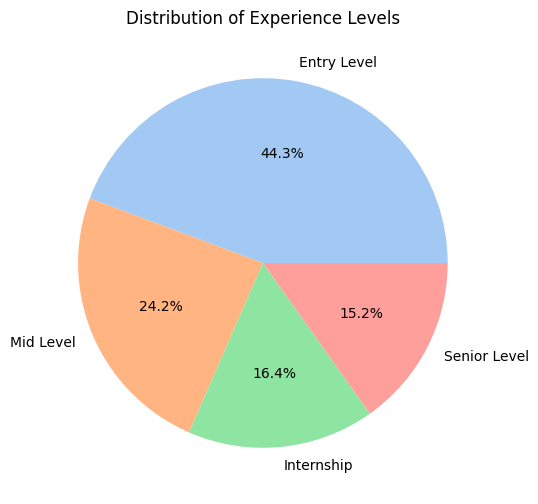

In [46]:
exp_counts = eda_data['experience_level'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(exp_counts.values, labels=exp_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Experience Levels')
#plt.savefig('notebooks/plots/job_type_pie.png')
plt.show()
